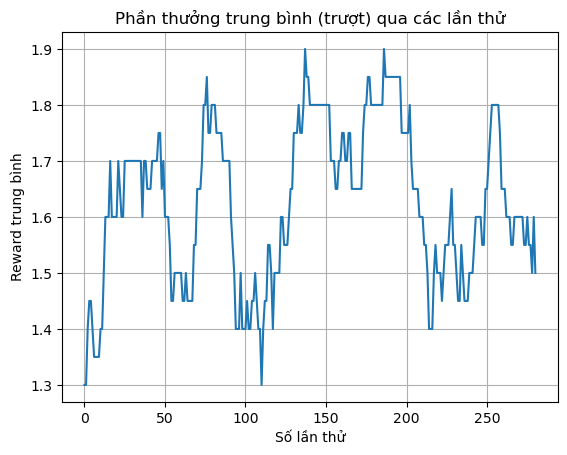

Q-values sau huấn luyện: {'A': 0.27354933235043505, 'B': 1.8184067919668934}


In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Các tham số cơ bản
actions = ['A', 'B']
q_values = {'A': 0.0, 'B': 0.0}
alpha = 0.1     # Learning rate
gamma = 0.9     # Discount factor
epsilon = 0.2   # Tỷ lệ exploration
episodes = 300

reward_history = []

def get_reward(action):
    if action == 'A':
        # Tuyến A: 70% bị trễ → reward thấp
        return np.random.choice([1, 0], p=[0.3, 0.7])
    elif action == 'B':
        # Tuyến B: ổn định hơn → reward cao hơn
        return np.random.choice([1, 2], p=[0.2, 0.8])

for ep in range(episodes):
    # Epsilon-greedy: chọn random hoặc chọn hành động tốt nhất
    if np.random.rand() < epsilon:
        action = np.random.choice(actions)
    else:
        action = max(q_values, key=q_values.get)

    reward = get_reward(action)
    q_values[action] = q_values[action] + alpha * (reward + gamma * 0 - q_values[action])  # No next state
    reward_history.append(reward)

# Vẽ biểu đồ kết quả
plt.plot(np.convolve(reward_history, np.ones(20)/20, mode='valid'))
plt.title('Phần thưởng trung bình (trượt) qua các lần thử')
plt.xlabel('Số lần thử')
plt.ylabel('Reward trung bình')
plt.grid(True)
plt.show()

# In kết quả cuối
print("Q-values sau huấn luyện:", q_values)